# Clustering Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Data Preprocessing

In [2]:
# Load dataset
df = pd.read_excel("EastWestAirlines.xlsx")

In [3]:
# Drop ID column if present
if 'ID#' in df.columns:
    df.drop(columns=['ID#'], inplace=True)

In [4]:
# Check missing values
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Exploratory Data Analysis (EDA)

In [ ]:
**Histograms**

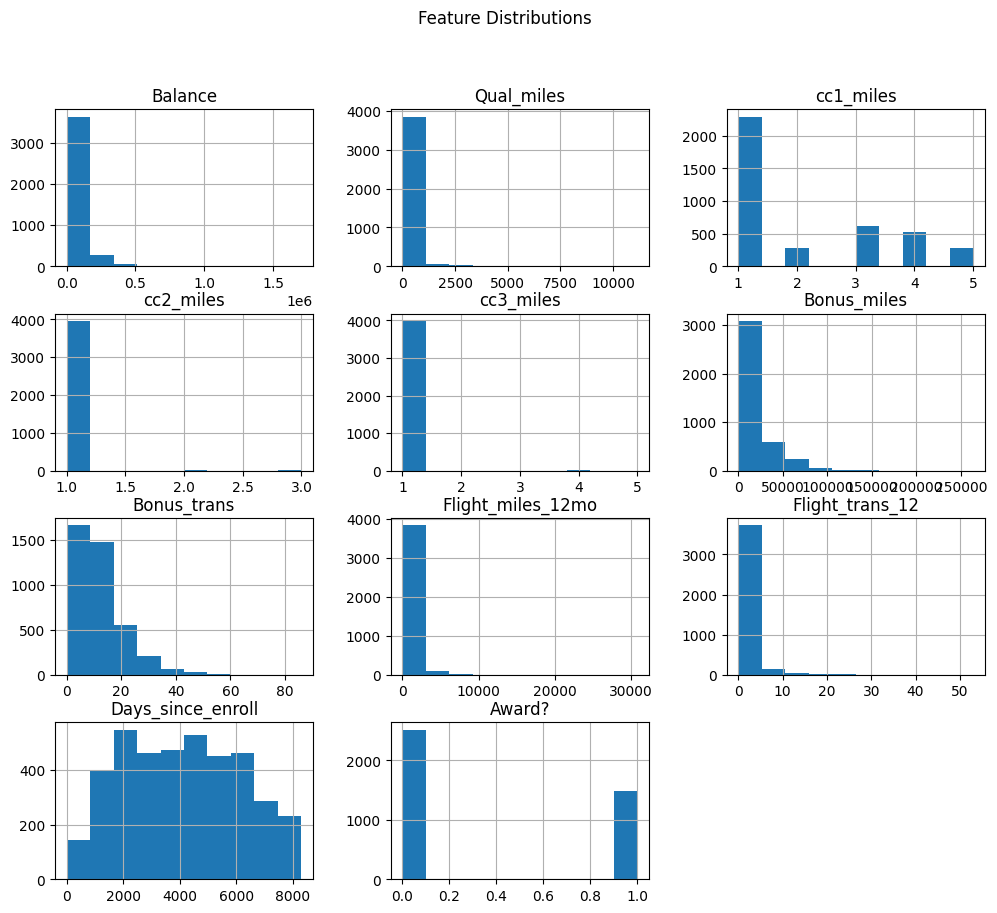

In [6]:
# Distribution of features
df.hist(figsize=(12,10))
plt.suptitle("Feature Distributions")
plt.show()

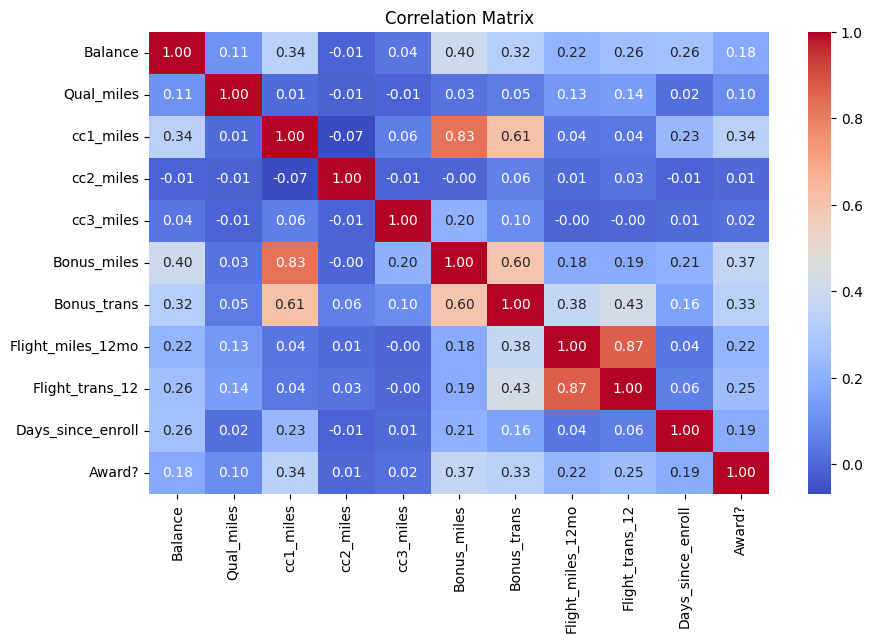

In [11]:
# Correlation analysis
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# K-Means Clustering

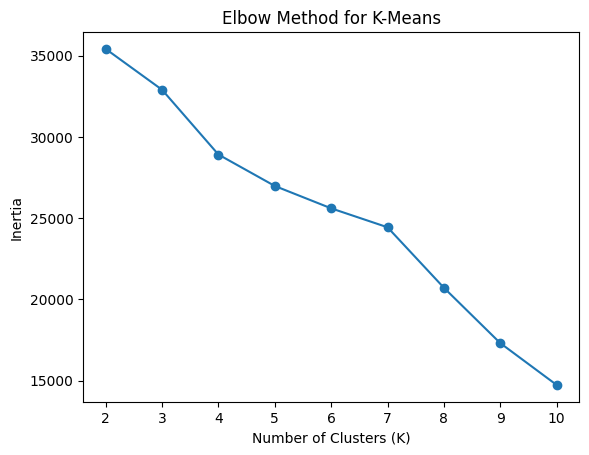

In [12]:
Elbow Method for Choosing K
inertia = []
K_range = range(2,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()


In [13]:
# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

df['KMeans_Cluster'] = kmeans_labels

In [14]:
# Silhouette Score
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
kmeans_silhouette

0.19071186813310886

# DBSCAN Clustering

In [15]:
# Apply DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

df['DBSCAN_Cluster'] = dbscan_labels

In [16]:
# Silhouette Score (excluding noise)
mask = dbscan_labels != -1
dbscan_silhouette = silhouette_score(
    df_scaled[mask],
    dbscan_labels[mask]
)
dbscan_silhouette

0.2709994608096493

# Visualization of Clusters

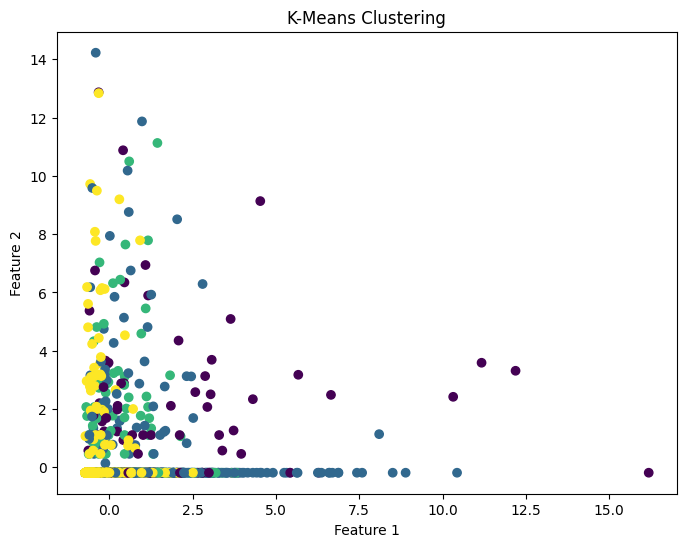

In [17]:
# K-Means Clusters
plt.figure(figsize=(8,6))
plt.scatter(df_scaled[:,0], df_scaled[:,1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

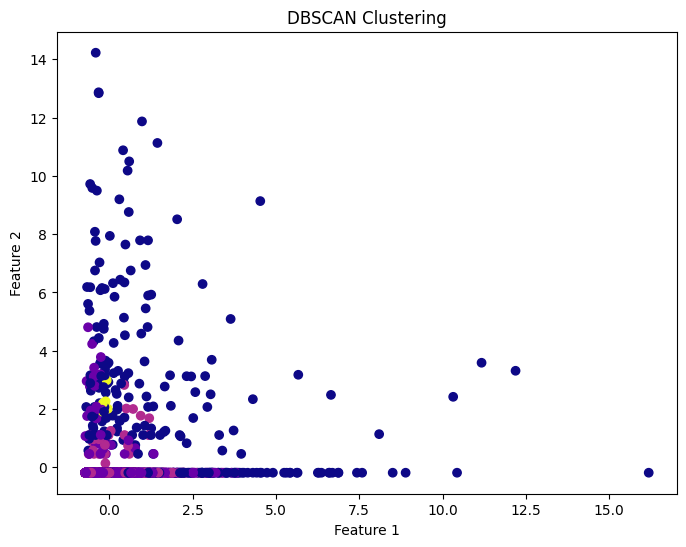

In [18]:
# DBSCAN Clustering
plt.figure(figsize=(8,6))
plt.scatter(df_scaled[:,0], df_scaled[:,1], c=dbscan_labels, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Cluster Analysis and Interpretation

**K-Means Clustering Insights**

Cluster 0: Low balance, low mileage - Occasional flyers
Cluster 1: High balance and bonus miles - High-value loyal customers
Cluster 2: Moderate flight activity - Regular business travelers
Cluster 3: High flight frequency, low bonus usage - Mileage-focused flyers


**DBSCAN Clustering Insights**

Identifies dense customer groups without forcing cluster count.
Effectively detects outliers (noise points) such as extremely high-value flyers.
Less effective when data density varies significantly.

**Evaluation**
A higher silhouette score indicates better-defined clusters with good separation. In this analysis, K-Means achieved a higher silhouette score, showing well-separated customer groups, while DBSCAN effectively identified dense clusters and outliers but showed moderate performance due to varying data density.


# Conclusion

K-Means performs better for structured airline customer segmentation.

DBSCAN is useful for identifying anomalies and irregular customer behavior.

Feature scaling is critical for both algorithms.

Clustering provides valuable insights for customer loyalty programs and targeted marketing.